In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Load the dataset
file_path = 'sentimentdataset.csv'
df = pd.read_csv(file_path)

In [52]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Overview of the DataSet

In [53]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


In [55]:
# Summary of numeric columns
print(df.describe())

       Unnamed: 0.1  Unnamed: 0    Retweets       Likes         Year  \
count    732.000000  732.000000  732.000000  732.000000   732.000000   
mean     366.464481  369.740437   21.508197   42.901639  2020.471311   
std      211.513936  212.428936    7.061286   14.089848     2.802285   
min        0.000000    0.000000    5.000000   10.000000  2010.000000   
25%      183.750000  185.750000   17.750000   34.750000  2019.000000   
50%      366.500000  370.500000   22.000000   43.000000  2021.000000   
75%      549.250000  553.250000   25.000000   50.000000  2023.000000   
max      732.000000  736.000000   40.000000   80.000000  2023.000000   

            Month         Day        Hour  
count  732.000000  732.000000  732.000000  
mean     6.122951   15.497268   15.521858  
std      3.411763    8.474553    4.113414  
min      1.000000    1.000000    0.000000  
25%      3.000000    9.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000  

In [56]:
# Unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unnamed: 0.1: 732 unique values
Unnamed: 0: 732 unique values
Text: 707 unique values
Sentiment: 279 unique values
Timestamp: 683 unique values
User: 685 unique values
Platform: 4 unique values
Hashtags: 697 unique values
Retweets: 26 unique values
Likes: 38 unique values
Country: 115 unique values
Year: 14 unique values
Month: 12 unique values
Day: 31 unique values
Hour: 22 unique values


In [57]:
# Drop unnecessary columns
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [58]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [59]:
# Check for missing values
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [60]:
# Count of unique sentiment values
num_unique_sentiments = df['Sentiment'].nunique()
print("Number of unique sentiment classes:", num_unique_sentiments)

# To also display what those unique values are
print("Unique sentiment values:", df['Sentiment'].unique())

Number of unique sentiment classes: 279
Unique sentiment values: [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '

## Exploratory Data Analysis

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_1988\4152484271.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Sentiment', order=top_sentiments, palette='Set2')


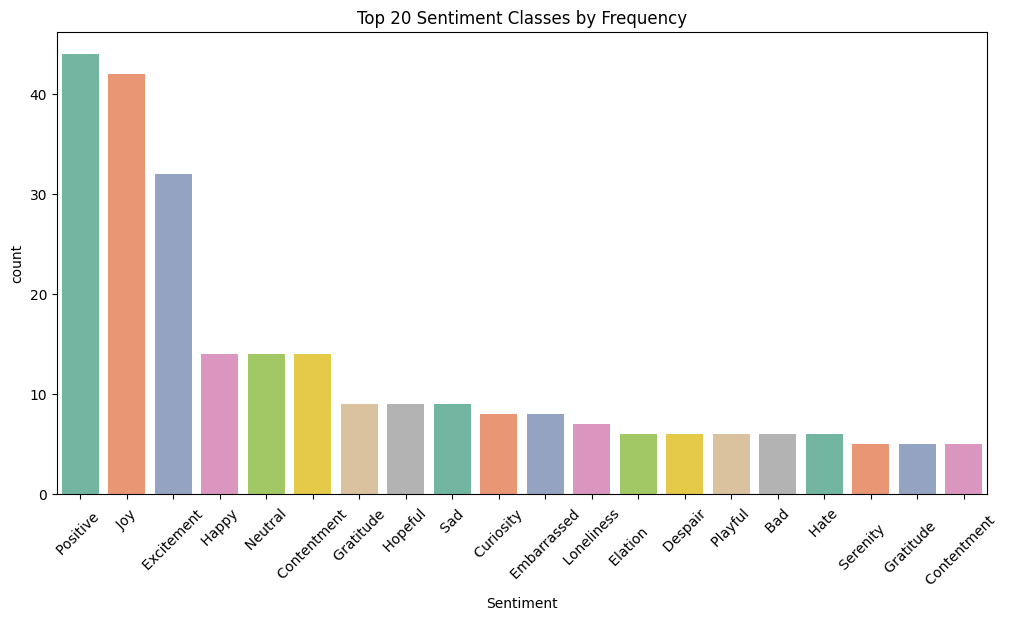

In [62]:
# Sentiment Distribution (Top 20 Sentiments)

top_sentiments = df['Sentiment'].value_counts().nlargest(20).index
filtered_df = df[df['Sentiment'].isin(top_sentiments)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, x='Sentiment', order=top_sentiments, palette='Set2')
plt.title("Top 20 Sentiment Classes by Frequency")
plt.xticks(rotation=45)
plt.show()

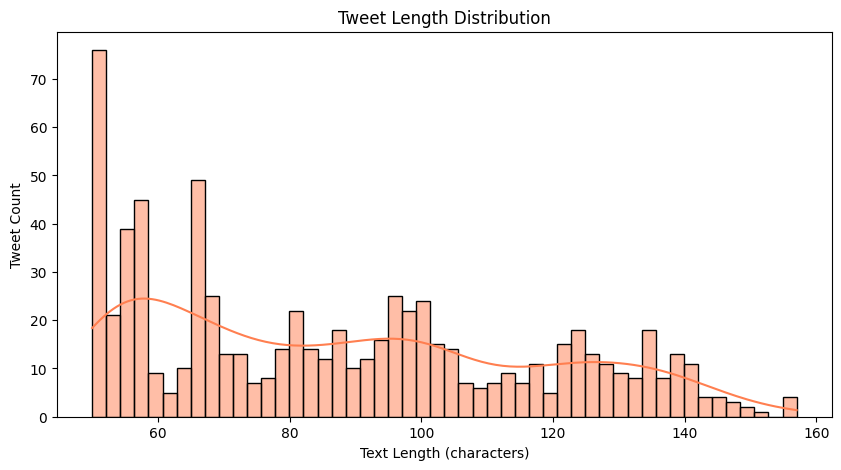

In [63]:
# Tweet Length Analysis

df['Text_Length'] = df['Text'].apply(len)

# Overall Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Text_Length'], bins=50, kde=True, color='coral')
plt.title("Tweet Length Distribution")
plt.xlabel("Text Length (characters)")
plt.ylabel("Tweet Count")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1988\662826858.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(tags), palette='crest')


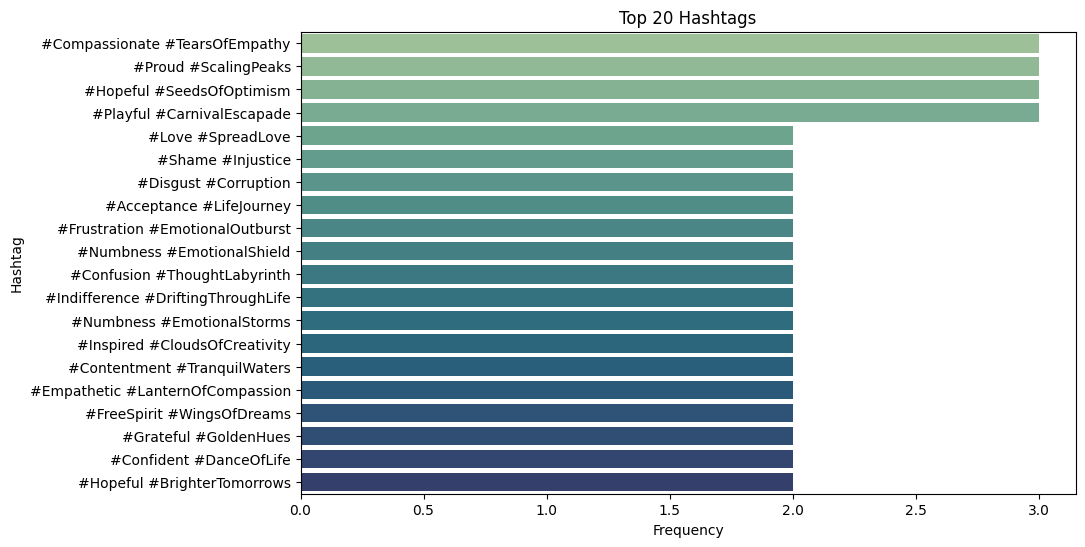

In [64]:
# Hashtag Frequency Analysis

from collections import Counter

# Convert hashtag strings to list
hashtag_series = df['Hashtags'].dropna().apply(lambda x: x.strip("[]").replace("'", "").split(', '))
hashtags = [tag.strip() for sublist in hashtag_series for tag in sublist]

top_hashtags = Counter(hashtags).most_common(20)
tags, freqs = zip(*top_hashtags)

plt.figure(figsize=(10,6))
sns.barplot(x=list(freqs), y=list(tags), palette='crest')
plt.title("Top 20 Hashtags")
plt.xlabel("Frequency")
plt.ylabel("Hashtag")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1988\3305416368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='coolwarm')


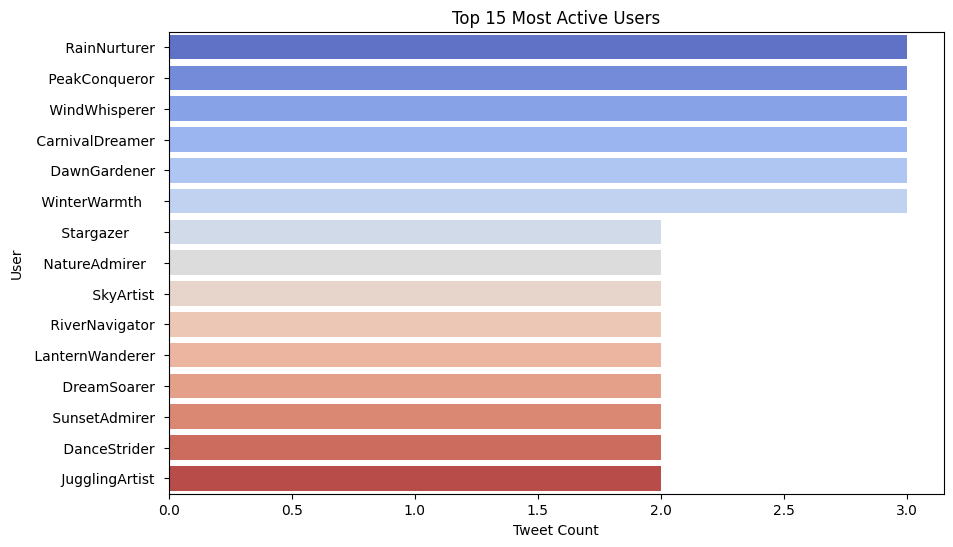

In [65]:
# User Activity – Top Posters

top_users = df['User'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_users.values, y=top_users.index, palette='coolwarm')
plt.title("Top 15 Most Active Users")
plt.xlabel("Tweet Count")
plt.ylabel("User")
plt.show()

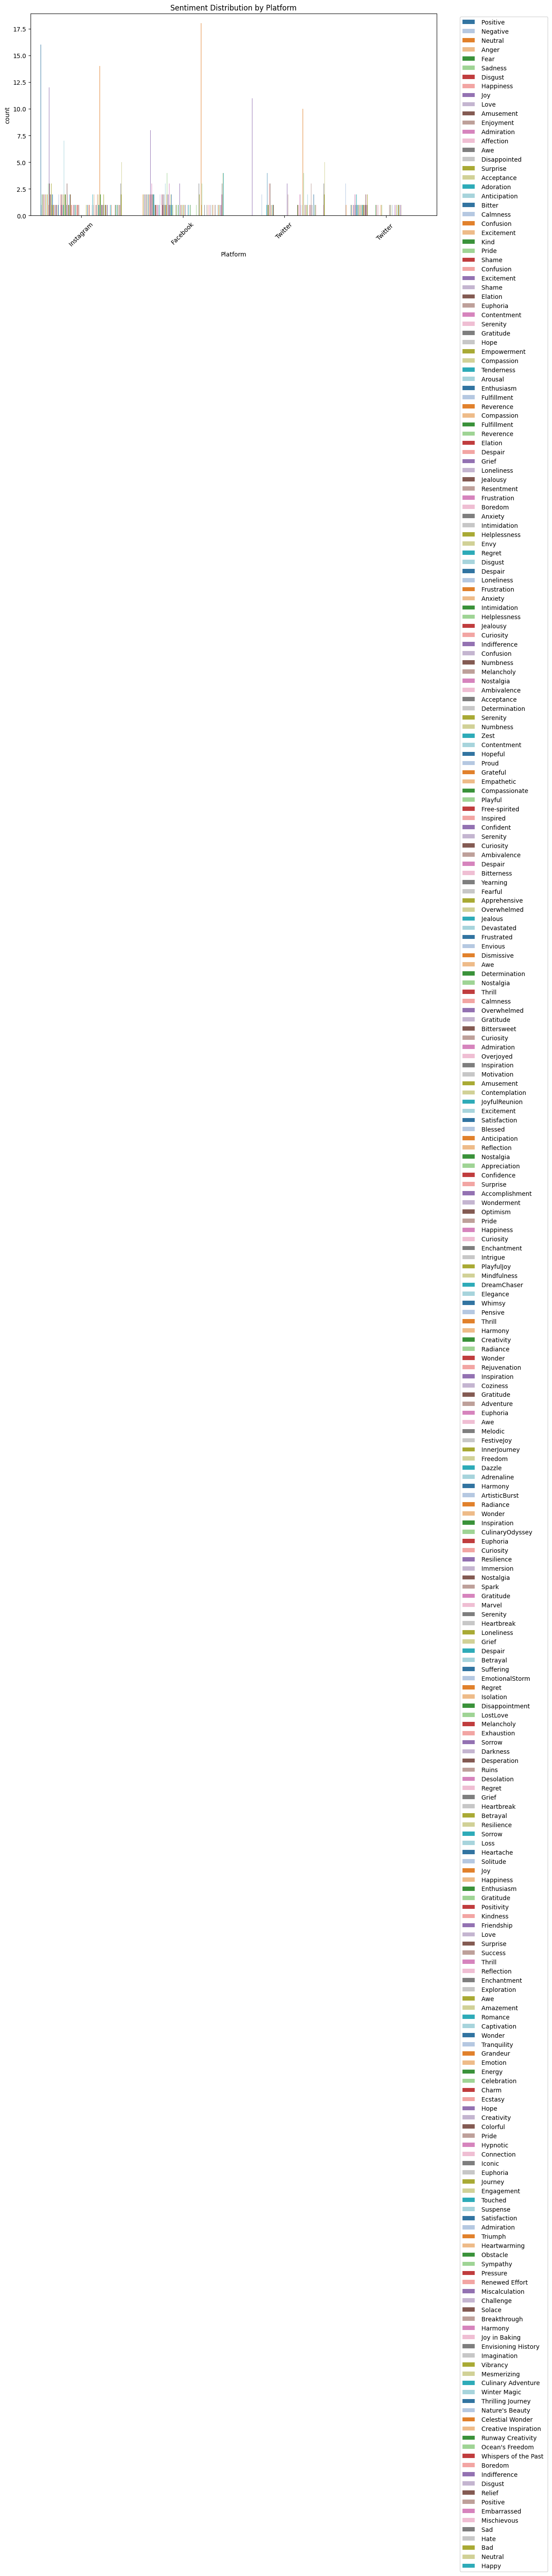

In [66]:
# Sentiment by Platform

top_platforms = df['Platform'].value_counts().nlargest(10).index
platform_df = df[df['Platform'].isin(top_platforms)]

plt.figure(figsize=(12,6))
sns.countplot(data=platform_df, x='Platform', hue='Sentiment', order=top_platforms, palette='tab20')
plt.title("Sentiment Distribution by Platform")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

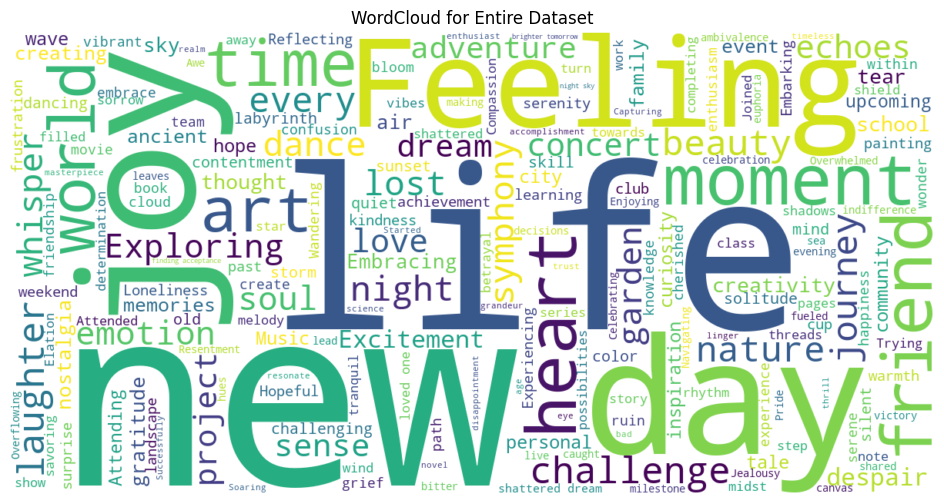

In [67]:
# WordCloud

from wordcloud import WordCloud

text_all = " ".join(df['Text'].dropna())
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text_all)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Entire Dataset")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1988\2659662775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_by_sentiment.values, y=likes_by_sentiment.index, palette='mako')


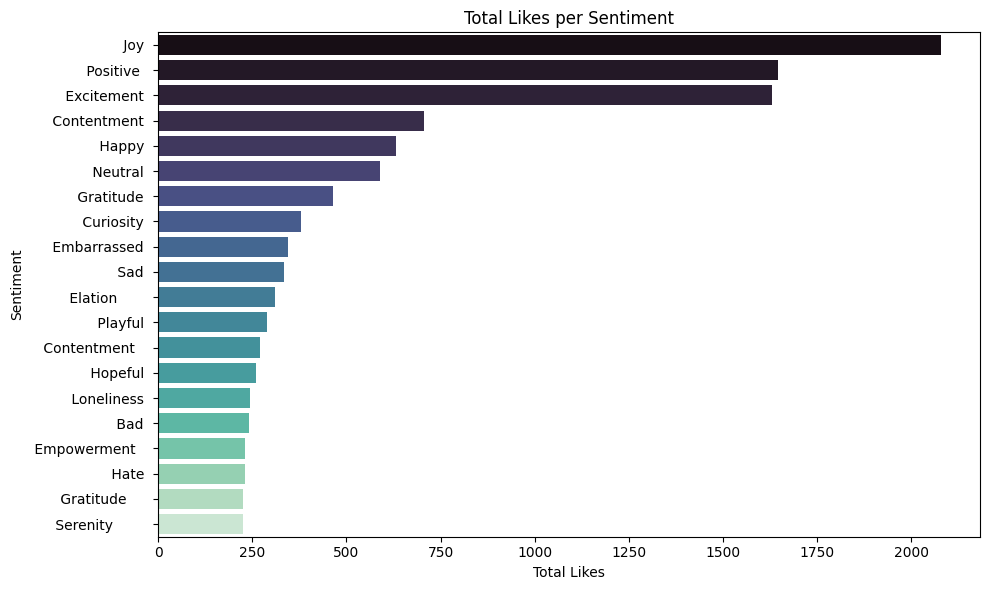

In [68]:
# Most Likes By Sentiment

likes_by_sentiment = df.groupby('Sentiment')['Likes'].sum().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=likes_by_sentiment.values, y=likes_by_sentiment.index, palette='mako')
plt.title("Total Likes per Sentiment")
plt.xlabel("Total Likes")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.show()

## Grouping Sentiments

The original dataset contains 279 unique sentiment labels, many of which are emotional synonyms, near-duplicates, or artistic expressions (e.g., Joy, Happiness, Gratitude, Euphoria, Curiosity, Winter Magic). Given the limited dataset size (732 rows), this high cardinality leads to extreme class imbalance and sparsity, which negatively impacts both the interpretability and performance of machine learning models.

In [69]:
df['Sentiment_clean'] = df['Sentiment'].str.lower().str.strip()

In [70]:
positive = [
    'positive', 'happy', 'joy', 'joyfulreunion', 'euphoria', 'enthusiasm', 'gratitude', 'grateful',
    'love', 'success', 'satisfaction', 'admiration', 'hope', 'hopeful', 'pride', 'proud', 'ecstasy',
    'celebration', 'confidence', 'confident', 'playful', 'playfuljoy', 'kindness', 'kind',
    'friendship', 'blessed', 'amusement', 'enjoyment', 'adoration', 'affection', 'awe',
    'appreciation', 'accomplishment', 'wonderment', 'optimism', 'enchantment', 'freedom',
    'radiance', 'rejuvenation', 'adventure', 'festivejoy', 'freedom', 'marvel', 'spark', 'resilience',
    'inspiration', 'inspired', 'engagement', 'heartwarming', 'triumph', 'touched', 'satisfaction',
    'energy', 'ecstasy', 'romance', 'captivation', 'amazement', 'emotion', 'celebration',
    'vibrancy', 'creative inspiration', 'culinary adventure', 'winter magic', 'celestial wonder',
    'runway creativity', 'charm', 'coziness', 'dreamchaser', 'whimsy', 'zest', 'elegance',
    'wonder', 'grandeur', 'motivation', 'innerjourney', 'artisticburst', 'colorful', 'envisioning history',
    'harmony', 'heartwarming', 'imagination', 'spark', 'success', 'elegance', 'reverence'
]

negative = [
    'negative', 'sadness', 'grief', 'anger', 'disgust', 'fear', 'hate', 'regret', 'loss', 'sorrow',
    'frustration', 'frustrated', 'despair', 'betrayal', 'loneliness', 'desperation', 'boredom', 'anxiety',
    'resentment', 'helplessness', 'envy', 'envious', 'jealous', 'jealousy', 'resentment',
    'devastated', 'dismay', 'embarrassed', 'intimidation', 'suffering', 'heartache', 'heartbreak',
    'bad', 'sad', 'shame', 'isolation', 'darkness', 'ruins', 'desolation', 'miscalculation',
    'obstacle', 'emotionalstorm', 'pressure', 'exhaustion', 'lostlove', 'disappointment',
    'overwhelmed', 'bitterness', 'melancholy', 'desperation', 'grief', 'depressed'
]

neutral = [
    'neutral', 'indifference', 'nostalgia', 'curiosity', 'reflection', 'acceptance', 'calmness',
    'contemplation', 'solace', 'pensive', 'contentment', 'serenity', 'numbness', 'ambivalence',
    'peace', 'okay', 'fine', 'emotion', 'mindfulness', 'whispers of the past'
]

mixed = [
    'culinaryodyssey', 'whimsy', 'vibrancy', "ocean's freedom", 'winter magic',
    'imagination', 'mesmerizing', 'runway creativity', "nature's beauty", 'thrilling journey',
    'joy in baking', 'envisioning history', 'creative inspiration', 'culinary adventure',
    'spark', 'thrill', 'thrill journey', 'dazzle', 'melodic', 'celebration', 'reverence',
    'dreamchaser', 'emotion', 'iconic', 'journey', 'freedom', 'hypnotic', 'colorful',
    'celestial wonder', 'radiance', 'grandeur', 'exploration', 'whimsy', 'trance', 'mystery'
]

# Mapping function
def map_sentiment(label):
    label = label.lower().strip()
    if label in positive:
        return 'Positive'
    elif label in negative:
        return 'Negative'
    elif label in neutral:
        return 'Neutral'
    elif label in mixed:
        return 'Other'
    else:
        return 'Other'

# Apply
df['Sentiment_grouped'] = df['Sentiment_clean'].apply(map_sentiment)

In [71]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length,Sentiment_clean,Sentiment_grouped
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,52,positive,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,52,negative,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,51,positive,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,52,positive,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,52,neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,110,happy,Positive
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,106,happy,Positive
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,99,happy,Positive
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,104,happy,Positive


In [72]:
sentiment_counts = df['Sentiment_grouped'].value_counts()

# Print numeric results
print("Grouped Sentiment Distribution:\n")
print(sentiment_counts)

Grouped Sentiment Distribution:

Sentiment_grouped
Positive    290
Negative    166
Other       157
Neutral     119
Name: count, dtype: int64


In [73]:
print(df[["Text"]].iloc[0])

Text     Enjoying a beautiful day at the park!        ...
Name: 0, dtype: object


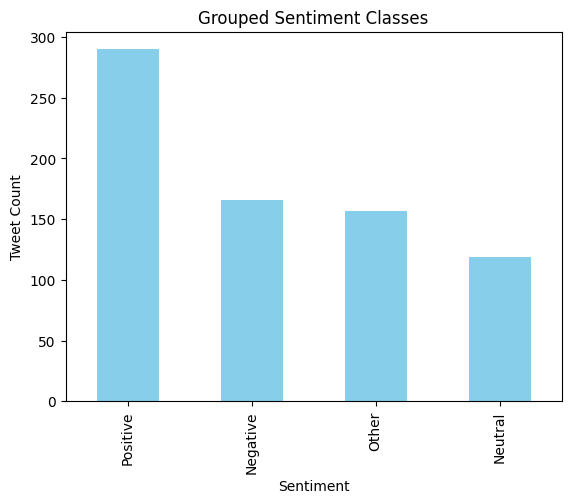

In [74]:
# Sentiment Distributi
df['Sentiment_grouped'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Grouped Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

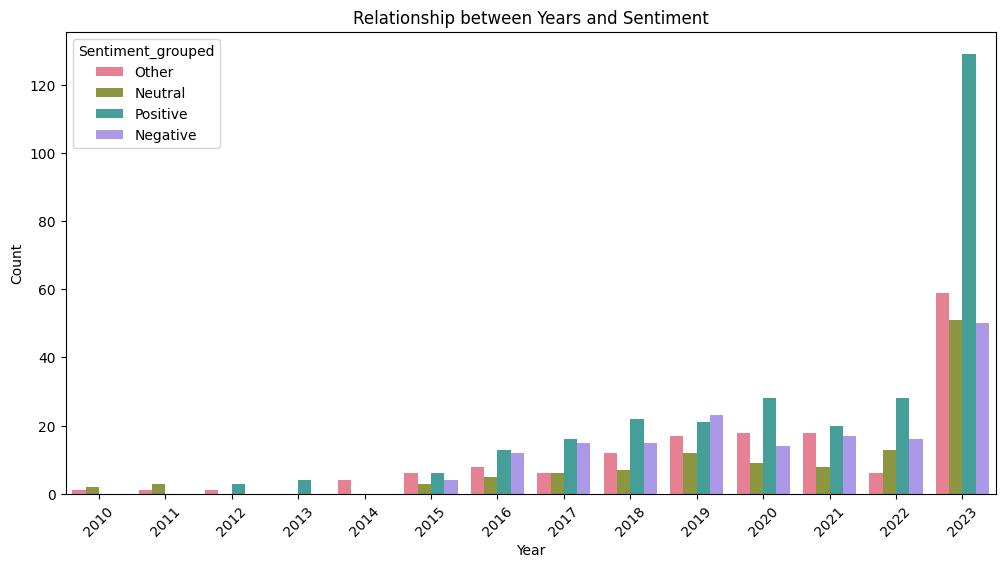

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment_grouped', data=df, palette='husl')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [80]:
month_mapping = {
    1: 'January',
    2: 'Feburary',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'Descember'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

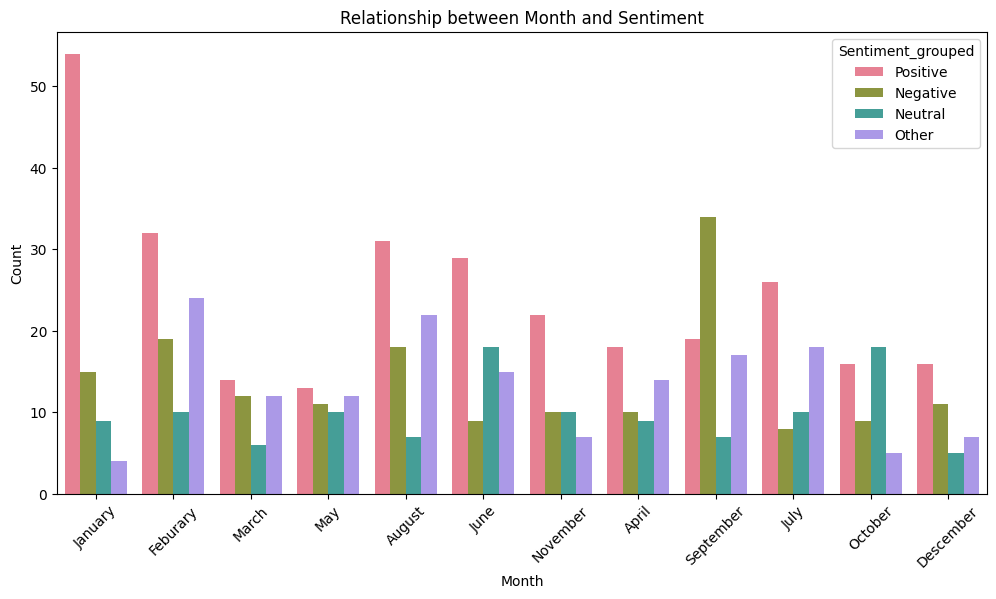

In [81]:


plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment_grouped', data=df, palette='husl')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [82]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

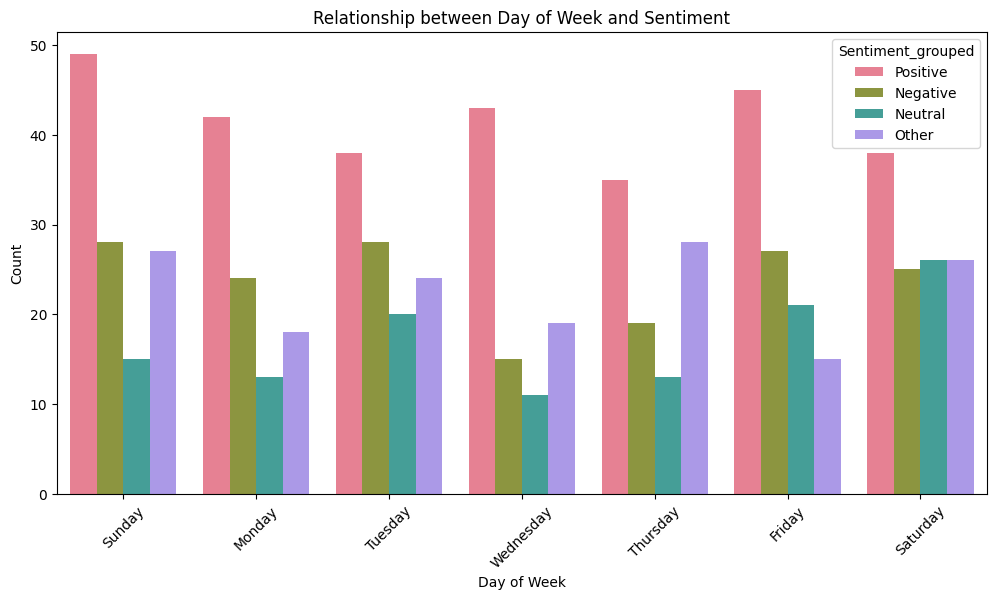

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment_grouped', data=df, palette='husl')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Text Preprocessing for Modeling

In [84]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length,Sentiment_clean,Sentiment_grouped,Day_of_Week
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,January,15,12,52,positive,Positive,Sunday
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,January,15,8,52,negative,Negative,Sunday
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,January,15,15,51,positive,Positive,Sunday
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,January,15,18,52,positive,Positive,Sunday
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,January,15,19,52,neutral,Neutral,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,August,18,18,110,happy,Positive,Friday
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,June,22,14,106,happy,Positive,Friday
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,April,5,17,99,happy,Positive,Friday
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,Feburary,29,20,104,happy,Positive,Saturday


In [85]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download once if not already done

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    text = emoji.replace_emoji(text, replace='')

    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove mentions, hashtags, numbers
    text = re.sub(r"@\w+|#\w+|\d+", '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


# Making new columns to be used for TF-IDF
df['Clean_Text'] = df['Text'].astype(str).apply(preprocess_text)
df[['Text', 'Clean_Text']].head(3)

,Text,Clean_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout


In [90]:
print(df[df["Sentiment_grouped"] == "Other"]['Text'].iloc[0])

 Pure happiness: celebrating a loved one's achievement! 


## TF-IDF Vectorization

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform
X_tfidf = tfidf.fit_transform(df['Clean_Text'])

# Get labels (target)
y = df['Sentiment_grouped']
    

## Modeling

In [92]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5737 stored elements and shape (732, 2171)>

In [93]:
# Using the required columns only
df_model = df[['Clean_Text', 'Sentiment_grouped']].copy()

In [94]:
df_model

,Clean_Text,Sentiment_grouped
0,enjoying beautiful day park,Positive
1,traffic terrible morning,Negative
2,finished amazing workout,Positive
3,excited upcoming weekend getaway,Positive
4,trying new recipe dinner tonight,Neutral
...,...,...
727,collaborating science project received recogni...,Positive
728,attending surprise birthday party organized fr...,Positive
729,successfully fundraising school charity initia...,Positive
730,participating multicultural festival celebrati...,Positive


In [95]:
y = df_model['Sentiment_grouped']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [97]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (585, 2171)
Test shape: (147, 2171)


### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
# Initialize model
logreg = LogisticRegression(max_iter=1000)

In [100]:
# Train the model
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [101]:
# Predict on test data
y_pred = logreg.predict(X_test)

Logistic Regression Accuracy: 58.50%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.90      0.55      0.68        33
     Neutral       1.00      0.17      0.29        24
       Other       1.00      0.22      0.36        32
    Positive       0.49      0.98      0.66        58

    accuracy                           0.59       147
   macro avg       0.85      0.48      0.49       147
weighted avg       0.78      0.59      0.54       147



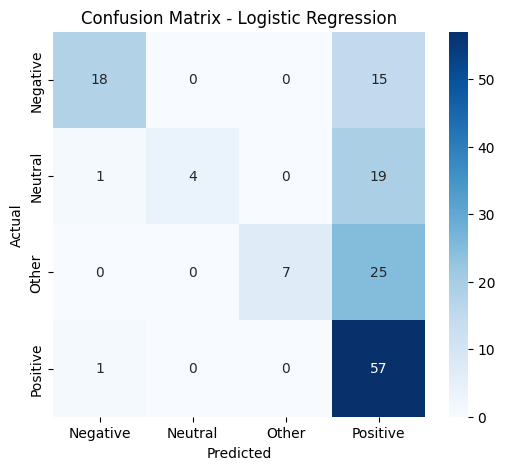

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy * 100))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

###  Random Forest Model

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

Random Forest Accuracy: 57.82%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.89      0.52      0.65        33
     Neutral       0.75      0.25      0.38        24
       Other       0.77      0.31      0.44        32
    Positive       0.49      0.90      0.63        58

    accuracy                           0.58       147
   macro avg       0.72      0.49      0.53       147
weighted avg       0.68      0.58      0.55       147



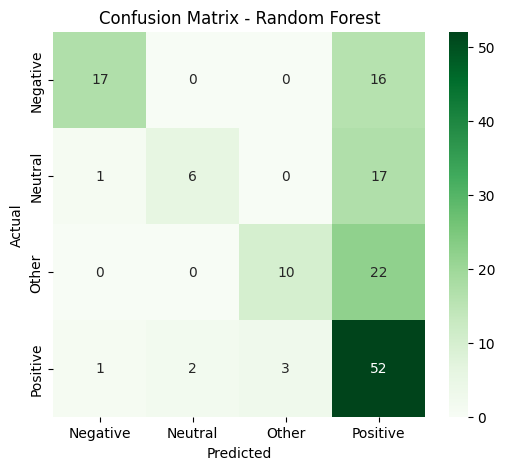

In [ ]:
# Accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

In [ ]:
answer = dt_model.predict(clean_text_transformed)
answer

array(['Other'], dtype=object)

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt * 100))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


NameError: name 'y_pred_dt' is not defined

### Naive Bayes Classifier

In [107]:
from sklearn.naive_bayes import MultinomialNB

# Initialize model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

Naive Bayes Accuracy: 60.54%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.85      0.70      0.77        33
     Neutral       1.00      0.21      0.34        24
       Other       1.00      0.12      0.22        32
    Positive       0.51      0.98      0.67        58

    accuracy                           0.61       147
   macro avg       0.84      0.50      0.50       147
weighted avg       0.77      0.61      0.54       147



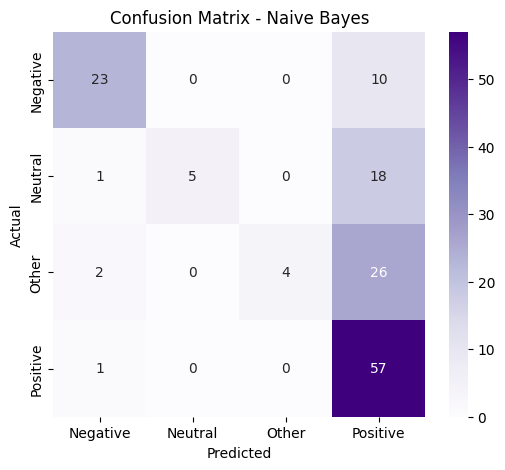

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))

# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


### XGBoost Model

In [110]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [111]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predict
y_pred_encoded = xgb_model.predict(X_test)

# Decode predicted labels back to original strings
y_pred_xgb = label_encoder.inverse_transform(y_pred_encoded)

d:\Projects\Deployments\deploy_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:01:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import joblib

joblib.dump(xgb_model, 'xgboost_classifier.pkl')
joblib.dump(label_encoder, "lablel_encoder.pkl")
joblib.dump(tfidf, "tfidf_vector.pkl")

['xgboost_classifier.pkl']

In [ ]:
import joblib 
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    text = emoji.replace_emoji(text, replace='')

    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove mentions, hashtags, numbers
    text = re.sub(r"@\w+|#\w+|\d+", '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)



tfidf_loaded = joblib.load('tfidf_vector.pkl')
model_loaded = joblib.load('xgboost_classifier.pkl')
label_encoder_loaded = joblib.load('lablel_encoder.pkl')


original_text = "I good bad"
clean_text = preprocess_text(original_text)

clean_text_transformed = tfidf_loaded.transform([clean_text])

answer_encoded = model_loaded.predict(clean_text_transformed)
answer = label_encoder_loaded.inverse_transform(answer_encoded)
answer

array(['Negative'], dtype=object)

In [123]:
answer[0]

'Negative'

In [ ]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1181 stored elements and shape (147, 2171)>

In [ ]:
clean_text_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (1, 2171)>

In [ ]:
answer_encoded = xgb_model.predict(clean_text_transformed)
answer = label_encoder.inverse_transform(answer_encoded)
answer

array(['Other'], dtype=object)

XGBoost Accuracy: 59.18%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.78      0.55      0.64        33
     Neutral       0.62      0.33      0.43        24
       Other       0.56      0.44      0.49        32
    Positive       0.55      0.81      0.65        58

    accuracy                           0.59       147
   macro avg       0.63      0.53      0.55       147
weighted avg       0.61      0.59      0.58       147



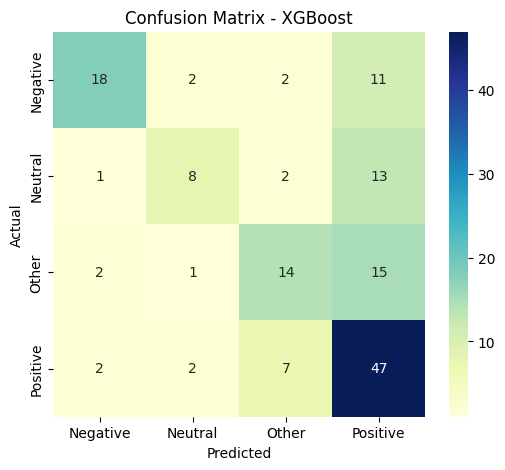

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy: {:.2f}%".format(accuracy_xgb * 100))

# Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


### Model Comparison

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }

results = []

# Logistic Regression
results.append(evaluate_model("Logistic Regression", y_test, y_pred))

# Random Forest
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))

# Decision Tree
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))

# Naive Bayes
results.append(evaluate_model("Naive Bayes", y_test, y_pred_nb))

# XGBoost
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))


In [ ]:
import pandas as pd

comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1 Score
4              XGBoost  0.591837   0.626126  0.531658  0.554824
1        Random Forest  0.578231   0.724987  0.493551  0.525898
2        Decision Tree  0.564626   0.558078  0.505470  0.519290
3          Naive Bayes  0.605442   0.841341  0.503265  0.502068
0  Logistic Regression  0.585034   0.847845  0.478407  0.494777


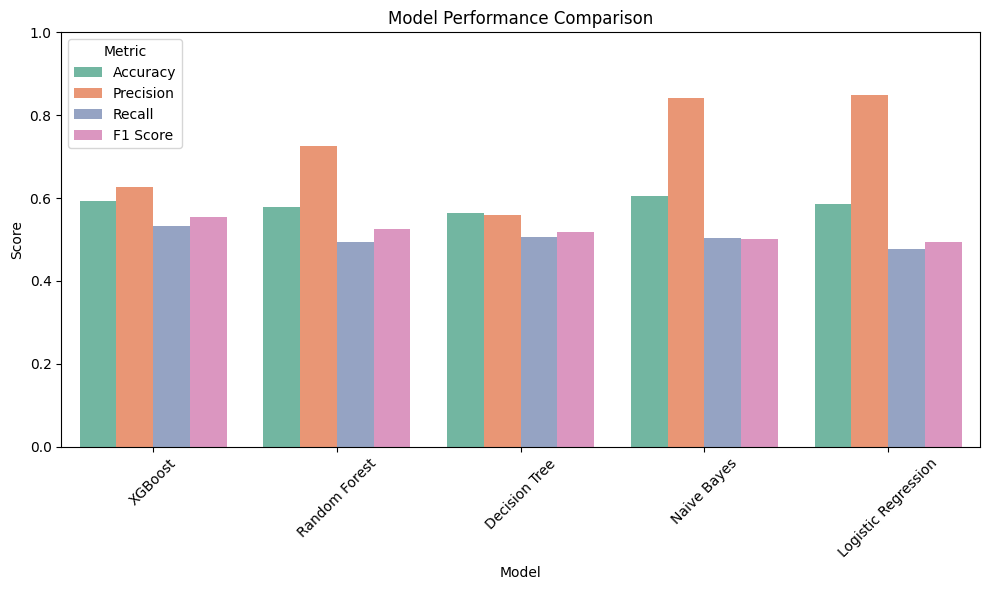

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=comparison_df.melt(id_vars='Model'), x='Model', y='value', hue='variable', palette='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Naive Bayes gives high accuracy as compared to others

## KMeans Clustering on TF-IDF

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans with 4 clusters (same as sentiment classes)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_tfidf)

# Add cluster labels to your dataframe
df['Cluster'] = kmeans_labels

In [ ]:
pd.crosstab(df['Cluster'], df['Sentiment_grouped'])

Sentiment_grouped,Negative,Neutral,Other,Positive
Cluster,,,,
0,136,98,112,240
1,4,1,10,6
2,25,9,10,20
3,1,11,25,24


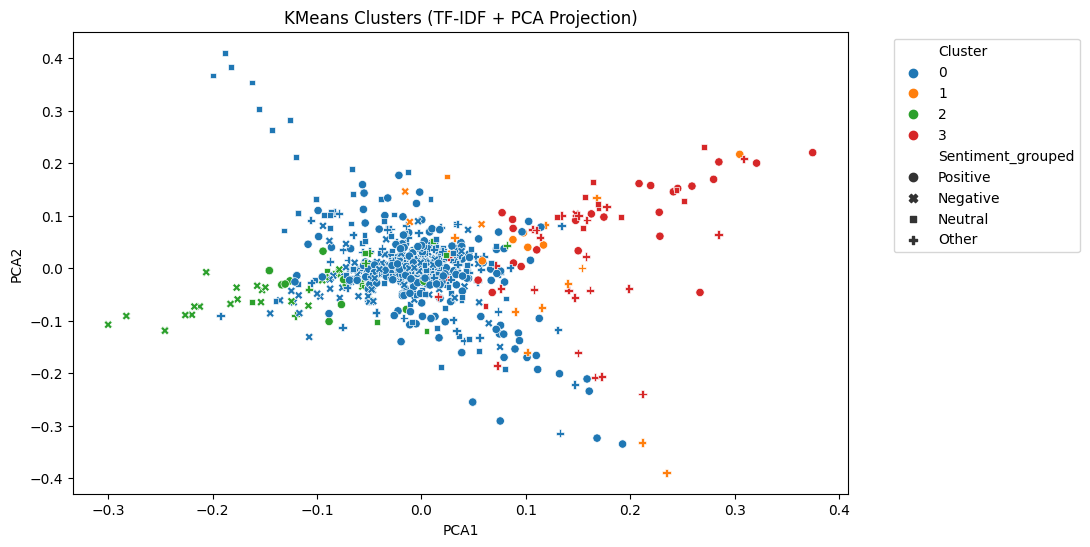

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2 dimensions for plotting
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Add PCA components to dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', style='Sentiment_grouped')
plt.title('KMeans Clusters (TF-IDF + PCA Projection)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [3]:
!streamlit run sentiment_pred_ui.py

^C
